## Data Loading and Preparation

In [1]:
import pandas as pd

# Load ClientGender.csv
client_gender_df = pd.read_csv(r'D:\Git\Clientgender\notebook\data\PurchaseHistory.csv')

# Load PurchaseHistory.csv
purchase_history_df = pd.read_csv(r'D:\Git\Clientgender\notebook\data\ClientGender.csv')

# Display the first few rows of each dataframe to verify the data has been loaded correctly
print("Client Gender Data:")
print(client_gender_df.head())

print("\nPurchase History Data:")
print(purchase_history_df.head())



Client Gender Data:
   client_id        date item_name    item_category purchase_amount
0        682  2021-03-04    Item80         Clothing          475.34
1         53  2020-07-13   Item195  Health & Beauty          139.62
2        242  2020-01-27    Item40      Electronics            29.7
3        587  2021-12-17    Item19      Electronics          303.16
4          9  2021-08-10   Item120    Home & Garden          465.82

Purchase History Data:
  client_id  gender
0     883.0    Male
1     329.0    Male
2     406.0  Female
3     809.0    Male
4     969.0  Female


In [2]:
# Print the shape of the ClientGender dataset
print("Client Gender Data Shape:", client_gender_df.shape)

# Print the shape of the PurchaseHistory dataset
print("Purchase History Data Shape:", purchase_history_df.shape)


Client Gender Data Shape: (15568, 5)
Purchase History Data Shape: (1102, 2)


In [3]:
# Print the data types and column names of the ClientGender dataset
print("Client Gender Data Info:")
print(client_gender_df.info())

# Print the data types and column names of the PurchaseHistory dataset
print("Purchase History Data Info:")
print(purchase_history_df.info())


Client Gender Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15568 entries, 0 to 15567
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   client_id        15568 non-null  int64 
 1   date             15568 non-null  object
 2   item_name        15568 non-null  object
 3   item_category    15568 non-null  object
 4   purchase_amount  15563 non-null  object
dtypes: int64(1), object(4)
memory usage: 608.2+ KB
None
Purchase History Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  1101 non-null   object
 1   gender     1101 non-null   object
dtypes: object(2)
memory usage: 17.3+ KB
None


#### Seems like client _id in purchase history data is object type. Print all the non-numeric values that made this column object

In [4]:
# Convert client_id column to numeric type, coercing errors
numeric_client_ids = pd.to_numeric(purchase_history_df['client_id'], errors='coerce')

# Filter out rows where conversion failed
non_numeric_client_ids = purchase_history_df[pd.isnull(numeric_client_ids)]

print("Non-numeric client_id values in Purchase History Data:")
print(non_numeric_client_ids)


Non-numeric client_id values in Purchase History Data:
    client_id gender
102   Unknown   Male
589       NaN   Male


 #### Convert the column client_id to numeric  by coercing the errors because these are not any useful.

In [5]:
# Convert client_id column to numeric type, coercing errors
purchase_history_df['client_id'] = pd.to_numeric(purchase_history_df['client_id'], errors='coerce')

# Drop rows with NaN client_id values (if any)
purchase_history_df = purchase_history_df.dropna(subset=['client_id'])

# Reset the index after dropping rows
purchase_history_df.reset_index(drop=True, inplace=True)

# Print the first few rows of the dataframe to verify the conversion
print("First few rows of Purchase History Data after converting client_id to numeric:")
print(purchase_history_df.head())

# Print the info of the dataframe after converting client_id to numeric and dropping NaN values
print("Info of Purchase History Data after conversion and dropping NaN values:")
print(purchase_history_df.info())

First few rows of Purchase History Data after converting client_id to numeric:
   client_id  gender
0      883.0    Male
1      329.0    Male
2      406.0  Female
3      809.0    Male
4      969.0  Female
Info of Purchase History Data after conversion and dropping NaN values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  1100 non-null   float64
 1   gender     1099 non-null   object 
dtypes: float64(1), object(1)
memory usage: 17.3+ KB
None


#### See unique values and their proportions of gender column

In [6]:
# Print the unique values of the gender column
unique_genders = purchase_history_df['gender'].unique()
print("Unique values of the gender column:")
print(unique_genders)

Unique values of the gender column:
['Male' 'Female' 'Non-Binary' nan]


In [7]:
# Calculate the proportion of unique values in the gender column
gender_proportions = purchase_history_df['gender'].value_counts(normalize=True)

# Print the proportion of unique values
print("Proportion of unique values in the gender column:")
print(gender_proportions)


Proportion of unique values in the gender column:
gender
Female        0.525933
Male          0.439490
Non-Binary    0.034577
Name: proportion, dtype: float64


In [8]:
# Drop null values in the gender column
purchase_history_df.dropna(subset=['gender'], inplace=True)

# Reset the index after dropping rows
purchase_history_df.reset_index(drop=True, inplace=True)

# Print the shape of the dataframe after dropping null values
print("Shape of Purchase History Data after dropping null values in gender column:", purchase_history_df.shape)


Shape of Purchase History Data after dropping null values in gender column: (1099, 2)


In [9]:
# Print the info of the dataframe after dropping null values in the gender column
print("Info of Purchase History Data after dropping null values in gender column:")
print(purchase_history_df.info())



Info of Purchase History Data after dropping null values in gender column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  1099 non-null   float64
 1   gender     1099 non-null   object 
dtypes: float64(1), object(1)
memory usage: 17.3+ KB
None


#### Merge the two data frames on client_id

In [10]:
# Merge the two dataframes on client_id
merged_df = pd.merge(purchase_history_df, client_gender_df, on='client_id', how='inner')

# Print the first few rows of the merged dataframe to verify the merge
print("Merged Data:")
print(merged_df.head())


Merged Data:
   client_id gender        date item_name    item_category purchase_amount
0      883.0   Male  2021-05-05    Item40      Electronics          204.71
1      883.0   Male  2020-11-27    Item40      Electronics          403.07
2      883.0   Male  2021-05-11   Item121            Books          214.13
3      883.0   Male  2021-01-06   Item161  Health & Beauty          315.41
4      883.0   Male  2020-12-09    Item80         Clothing          348.75


In [11]:
# Convert the client_id column to integer type
merged_df['client_id'] = merged_df['client_id'].astype(int)

# Print the first few rows of the merged dataframe to verify the conversion
print("Merged Data with client_id column converted to integer:")
print(merged_df.head())


Merged Data with client_id column converted to integer:
   client_id gender        date item_name    item_category purchase_amount
0        883   Male  2021-05-05    Item40      Electronics          204.71
1        883   Male  2020-11-27    Item40      Electronics          403.07
2        883   Male  2021-05-11   Item121            Books          214.13
3        883   Male  2021-01-06   Item161  Health & Beauty          315.41
4        883   Male  2020-12-09    Item80         Clothing          348.75


In [12]:
# Print the info of the merged dataframe
print("Info of Merged Data:")
print(merged_df.info())


Info of Merged Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15616 entries, 0 to 15615
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   client_id        15616 non-null  int32 
 1   gender           15616 non-null  object
 2   date             15616 non-null  object
 3   item_name        15616 non-null  object
 4   item_category    15616 non-null  object
 5   purchase_amount  15611 non-null  object
dtypes: int32(1), object(5)
memory usage: 671.1+ KB
None


#### See unique values of gender and their proportions of merged df

In [13]:
# Calculate the proportion of unique values in the gender column
gender_proportions = merged_df['gender'].value_counts(normalize=True)

# Print the unique values of gender and their proportions
print("Unique values of gender and their proportions:")
print(gender_proportions)


Unique values of gender and their proportions:
gender
Female        0.624872
Male          0.330943
Non-Binary    0.044185
Name: proportion, dtype: float64


#### Looks like the purchase_amount column is object. It is supposed to be float. Check the non-numeric values that made it object.

In [14]:
# Convert purchase_amount column to numeric type, coercing errors
merged_df['purchase_amount_numeric'] = pd.to_numeric(merged_df['purchase_amount'], errors='coerce')

# Count the number of non-numeric values
non_numeric_count = merged_df['purchase_amount_numeric'].isna().sum()

# Print the count of non-numeric values
print("Number of non-numeric values in purchase_amount column:", non_numeric_count)



Number of non-numeric values in purchase_amount column: 5


#### Convert the purchase_amount column by coercing the errors. Then remove the rows where the purchase_amount is nan

In [15]:
# Convert purchase_amount column to numeric type, coercing errors
merged_df['purchase_amount'] = pd.to_numeric(merged_df['purchase_amount'], errors='coerce')

# Remove rows where purchase_amount is NaN
merged_df = merged_df.dropna(subset=['purchase_amount'])

# Reset the index after dropping rows
merged_df.reset_index(drop=True, inplace=True)

# Print the info of the dataframe after conversion and dropping NaN values
print("Info of Merged Data after conversion and dropping NaN values in purchase_amount column:")
print(merged_df.info())


Info of Merged Data after conversion and dropping NaN values in purchase_amount column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15611 entries, 0 to 15610
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_id                15611 non-null  int32  
 1   gender                   15611 non-null  object 
 2   date                     15611 non-null  object 
 3   item_name                15611 non-null  object 
 4   item_category            15611 non-null  object 
 5   purchase_amount          15611 non-null  float64
 6   purchase_amount_numeric  15611 non-null  float64
dtypes: float64(2), int32(1), object(4)
memory usage: 792.9+ KB
None


#### See unique values and their proportions of item_name and item_category

In [16]:
# Calculate the proportion of unique values in the item_name column
item_name_proportions = merged_df['item_name'].value_counts(normalize=True)

# Calculate the proportion of unique values in the item_category column
item_category_proportions = merged_df['item_category'].value_counts(normalize=True)

# Print the unique values of item_name and their proportions
print("Unique values of item_name and their proportions:")
print(item_name_proportions)
print("\n")

# Print the unique values of item_category and their proportions
print("Unique values of item_category and their proportions:")
print(item_category_proportions)


Unique values of item_name and their proportions:
item_name
Item40     0.164692
Item161    0.141054
Item80     0.131574
Item121    0.106720
Item120    0.088719
             ...   
Item10     0.000320
Item13     0.000320
Item4      0.000320
Item11     0.000256
Item3      0.000256
Name: proportion, Length: 200, dtype: float64


Unique values of item_category and their proportions:
item_category
Books              0.205945
Health & Beauty    0.203190
Clothing           0.198898
Home & Garden      0.197425
Electronics        0.194478
UnknownCategory    0.000064
Name: proportion, dtype: float64


#### Convert the date to datetime

In [17]:
# Convert date column to datetime format
#merged_df['date'] = pd.to_datetime(merged_df['date'])

# Print the first few rows of the dataframe to verify the conversion
# print("Merged Data with date column converted to datetime:")
# print(merged_df.head())


#### Looks like some values don't conform with the format. see the values that don't conform with the format.

In [18]:
# Convert date column to datetime format with errors='coerce'
merged_df['date_converted'] = pd.to_datetime(merged_df['date'], errors='coerce')

# Count the number of non-conforming date values
non_conforming_count = pd.isnull(merged_df['date_converted']).sum()

# Print the count of non-conforming date values
print("Number of non-conforming date values:", non_conforming_count)



Number of non-conforming date values: 1


In [19]:
# Filter out rows where conversion failed
non_conforming_dates = merged_df[pd.isnull(merged_df['date_converted'])]

# Print the gender column for the non-conforming date values
print("Gender associated with non-conforming date values:")
print(non_conforming_dates['gender'].unique())


Gender associated with non-conforming date values:
['Female']


#### The gender of incosistent date is with Female gender type. We do have enough values of Female type. So, we chose to drop it rather than repair it.

In [20]:
# Convert date column to datetime format with errors='coerce'
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

# Drop rows where date is NaT
merged_df = merged_df.dropna(subset=['date'])

# Reset the index after dropping rows
merged_df.reset_index(drop=True, inplace=True)

print(merged_df.head())

# Print the info of the dataframe after conversion and dropping NaT values
print("Info of Merged Data after conversion and dropping NaT values in date column:")
print(merged_df.info())

   client_id gender       date item_name    item_category  purchase_amount  \
0        883   Male 2021-05-05    Item40      Electronics           204.71   
1        883   Male 2020-11-27    Item40      Electronics           403.07   
2        883   Male 2021-05-11   Item121            Books           214.13   
3        883   Male 2021-01-06   Item161  Health & Beauty           315.41   
4        883   Male 2020-12-09    Item80         Clothing           348.75   

   purchase_amount_numeric date_converted  
0                   204.71     2021-05-05  
1                   403.07     2020-11-27  
2                   214.13     2021-05-11  
3                   315.41     2021-01-06  
4                   348.75     2020-12-09  
Info of Merged Data after conversion and dropping NaT values in date column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15610 entries, 0 to 15609
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------          

In [21]:
# Drop the purchase_amount_numeric column
merged_df.drop(columns=['purchase_amount_numeric'], inplace=True)

# Print the first few rows of the dataframe to verify the column is dropped
print("Merged Data with purchase_amount_numeric column dropped:")
print(merged_df.head())


Merged Data with purchase_amount_numeric column dropped:
   client_id gender       date item_name    item_category  purchase_amount  \
0        883   Male 2021-05-05    Item40      Electronics           204.71   
1        883   Male 2020-11-27    Item40      Electronics           403.07   
2        883   Male 2021-05-11   Item121            Books           214.13   
3        883   Male 2021-01-06   Item161  Health & Beauty           315.41   
4        883   Male 2020-12-09    Item80         Clothing           348.75   

  date_converted  
0     2021-05-05  
1     2020-11-27  
2     2021-05-11  
3     2021-01-06  
4     2020-12-09  


In [22]:
# Drop the date_converted column
merged_df.drop(columns=['date_converted'], inplace=True)

# Print the first few rows of the dataframe to verify the column is dropped
print("Merged Data with date_converted column dropped:")
print(merged_df.head())


Merged Data with date_converted column dropped:
   client_id gender       date item_name    item_category  purchase_amount
0        883   Male 2021-05-05    Item40      Electronics           204.71
1        883   Male 2020-11-27    Item40      Electronics           403.07
2        883   Male 2021-05-11   Item121            Books           214.13
3        883   Male 2021-01-06   Item161  Health & Beauty           315.41
4        883   Male 2020-12-09    Item80         Clothing           348.75


## Exploratory Data Analysis

### Bar chart to visualise the proportions of gender

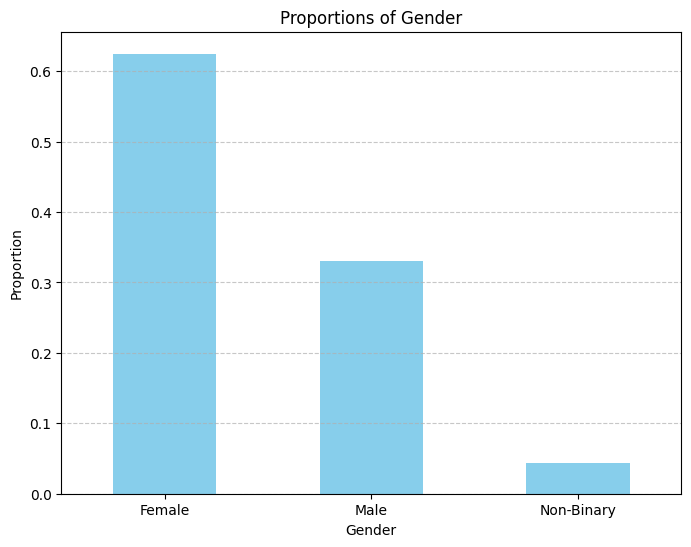

In [23]:
import matplotlib.pyplot as plt

# Calculate the proportion of unique values in the gender column
gender_proportions = merged_df['gender'].value_counts(normalize=True)

# Create a bar chart
plt.figure(figsize=(8, 6))
gender_proportions.plot(kind='bar', color='skyblue')
plt.title('Proportions of Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Point to note: There is some class imbalancing with the model as there is a very low proportion of Non-Binary gender.

### Visualize the total purchase amount by gender using Bar Chart

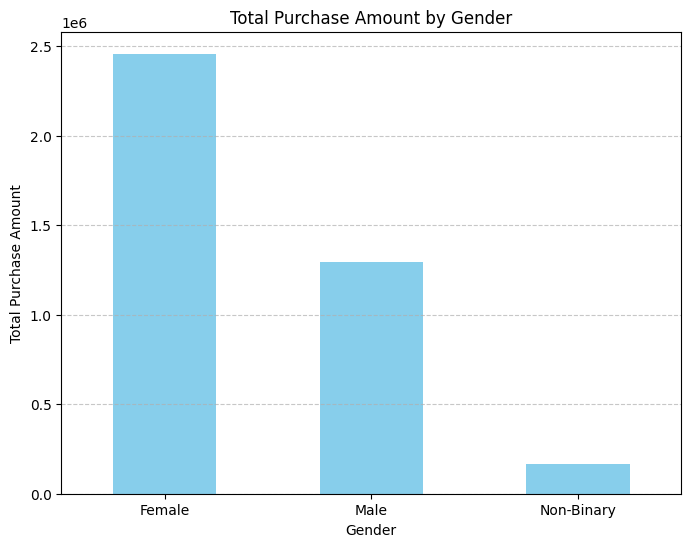

In [24]:
# Group by gender and sum the purchase amount
purchase_amount_by_gender = merged_df.groupby('gender')['purchase_amount'].sum()

# Create a bar chart
plt.figure(figsize=(8, 6))
purchase_amount_by_gender.plot(kind='bar', color='skyblue')
plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Bar charts, for every item_category, to visualise the purchase amount by gender.

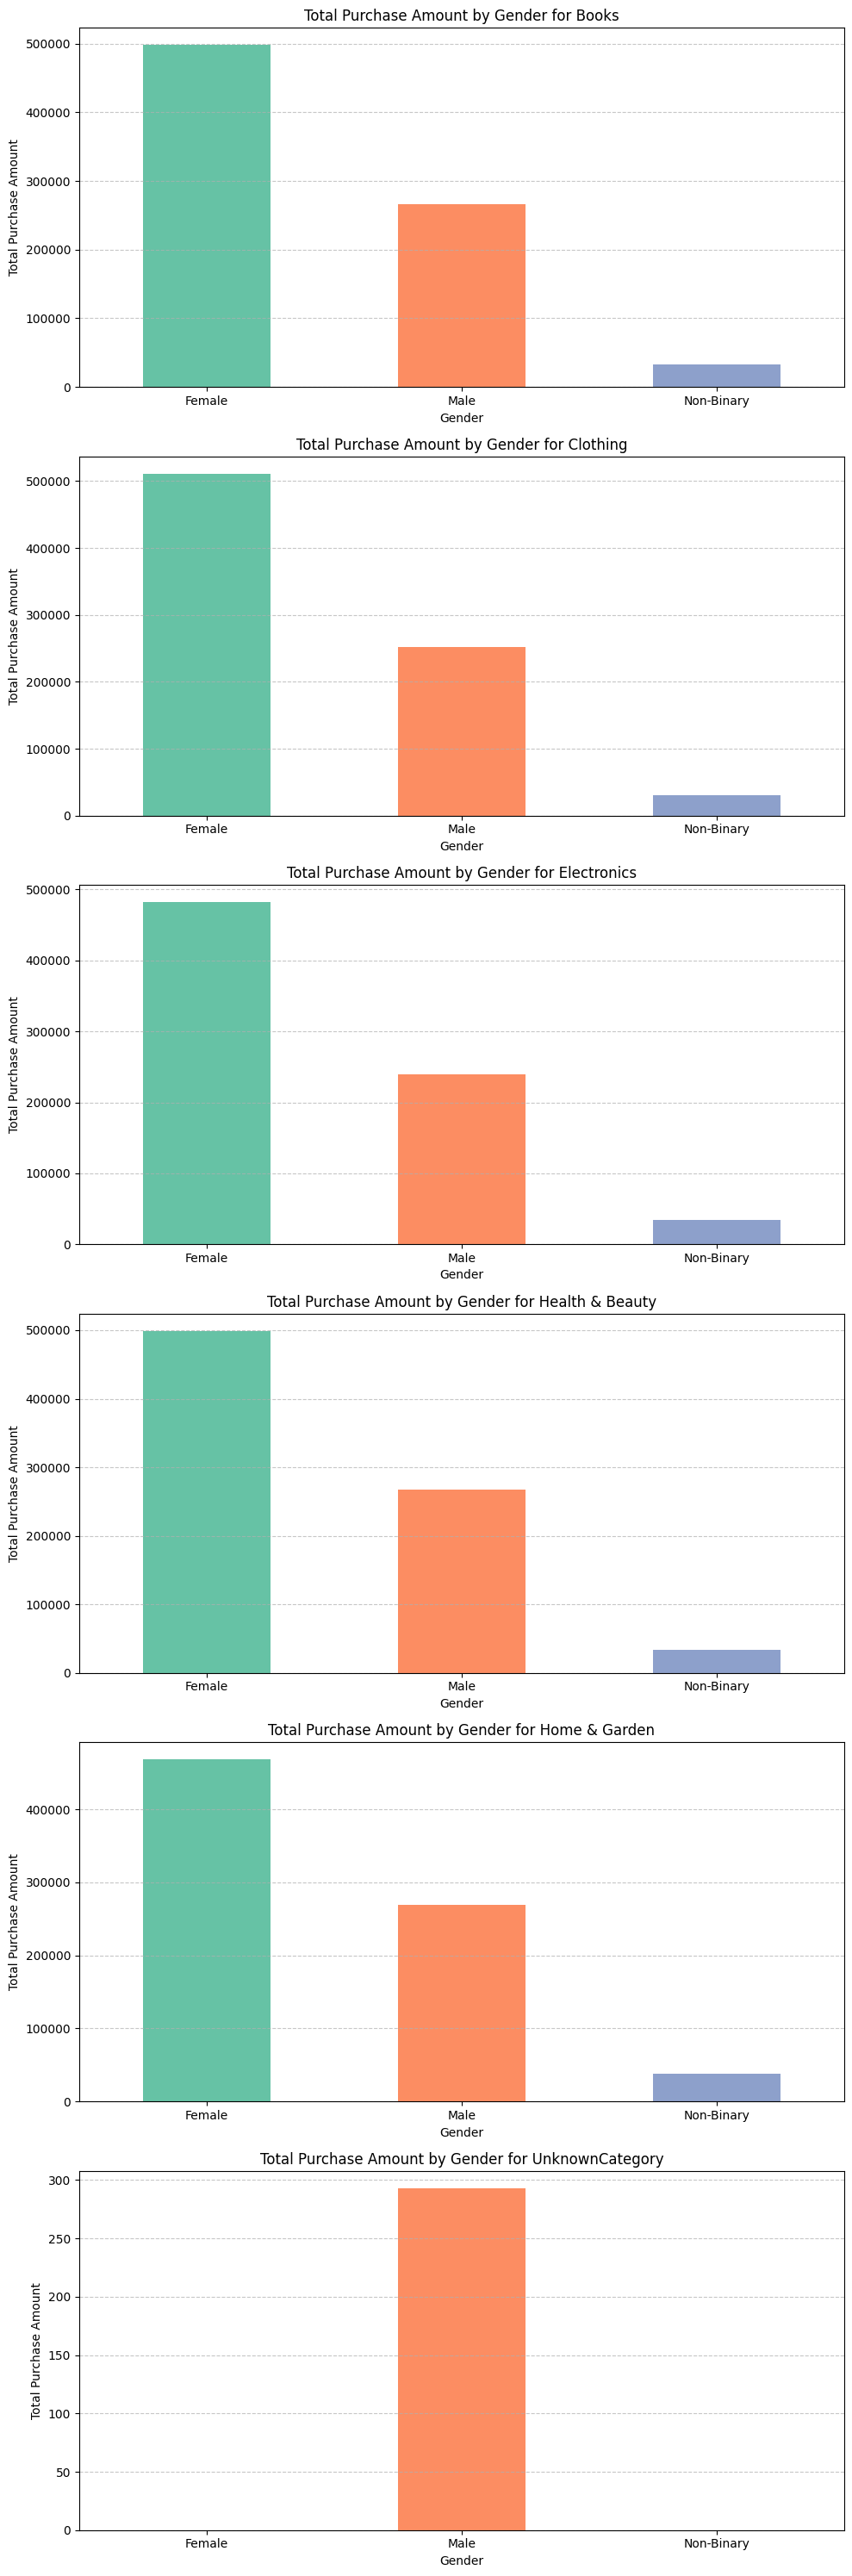

In [25]:
import seaborn as sns

# Group by item_category and gender, and sum the purchase amount
purchase_amount_by_category_gender = merged_df.groupby(['item_category', 'gender'])['purchase_amount'].sum().unstack()

# Create bar charts for each item_category
num_categories = len(purchase_amount_by_category_gender)
fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(10, 5 * num_categories))

for i, (category, data) in enumerate(purchase_amount_by_category_gender.iterrows()):
    ax = axes[i]
    data.plot(kind='bar', ax=ax, color=sns.color_palette("Set2"))
    ax.set_title(f'Total Purchase Amount by Gender for {category}')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Total Purchase Amount')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticklabels(data.index, rotation=0)

plt.tight_layout()
plt.show()


#### Point to note: The unknown category is purchased only by males.

### Visualise monthly purchase for each gender

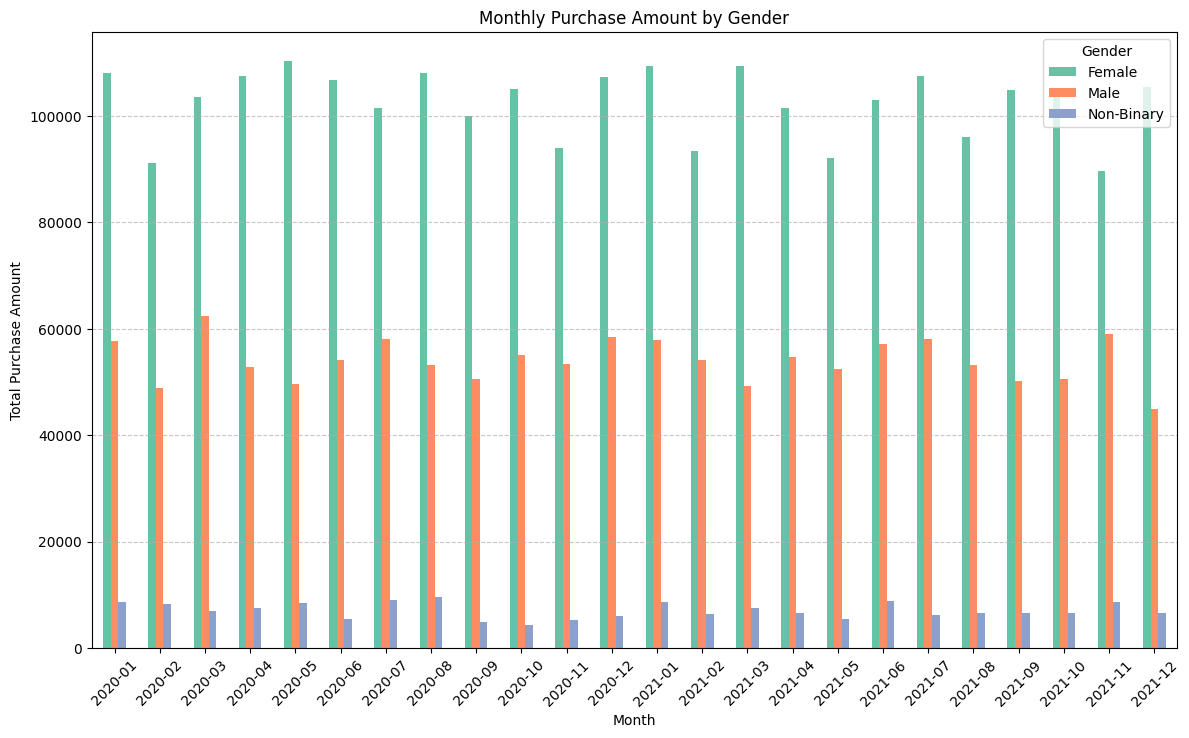

In [26]:
# Extract month from the date column
merged_df['month'] = merged_df['date'].dt.to_period('M')

# Group by month and gender, and sum the purchase amount
monthly_purchase_by_gender = merged_df.groupby(['month', 'gender'])['purchase_amount'].sum().unstack()

# Plot the bar chart
monthly_purchase_by_gender.plot(kind='bar', stacked=False, figsize=(14, 8), color=sns.color_palette("Set2"))

# Customize the plot
plt.title('Monthly Purchase Amount by Gender')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


###  Visualise date on x axis and purchase amount on y axis with a scatter plot and use different colors of dots for different gender.

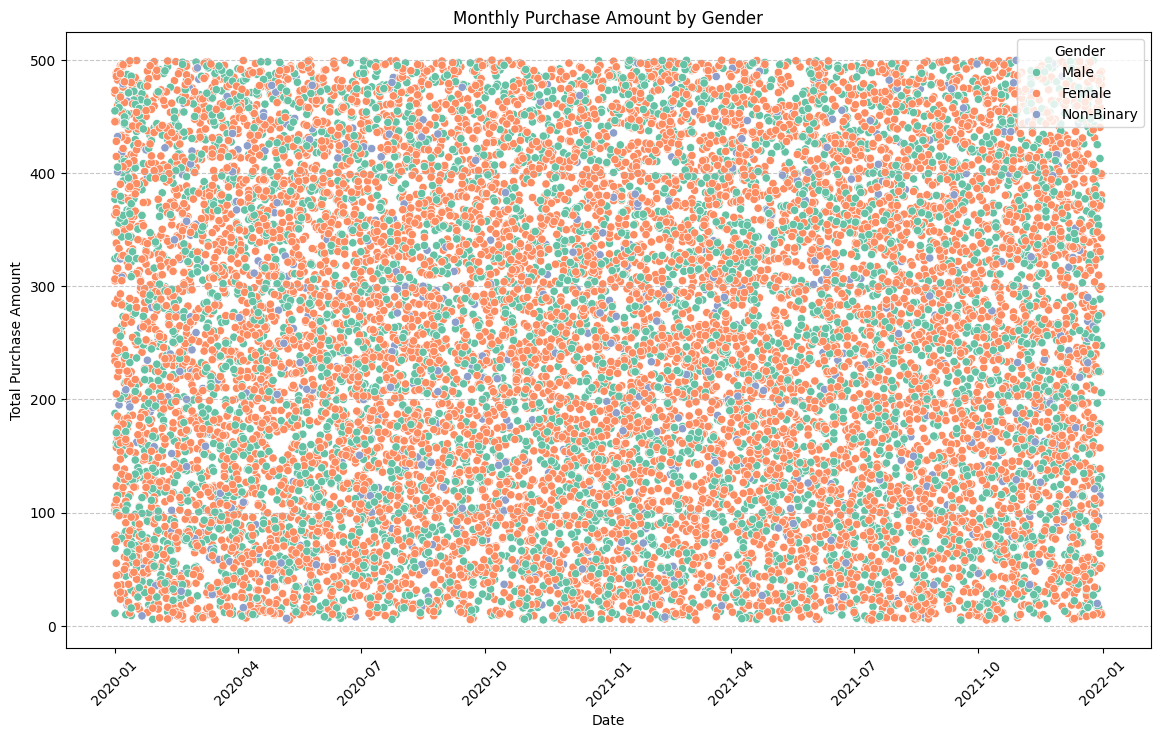

In [27]:
# Ensure the date column is in datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Create a scatter plot
plt.figure(figsize=(14, 8))

# Use seaborn to create a scatter plot with hue for gender
sns.scatterplot(data=merged_df, x='date', y='purchase_amount', hue='gender', palette="Set2")

# Customize the plot
plt.title('Monthly Purchase Amount by Gender')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Visualise the distribution of purchase amounts

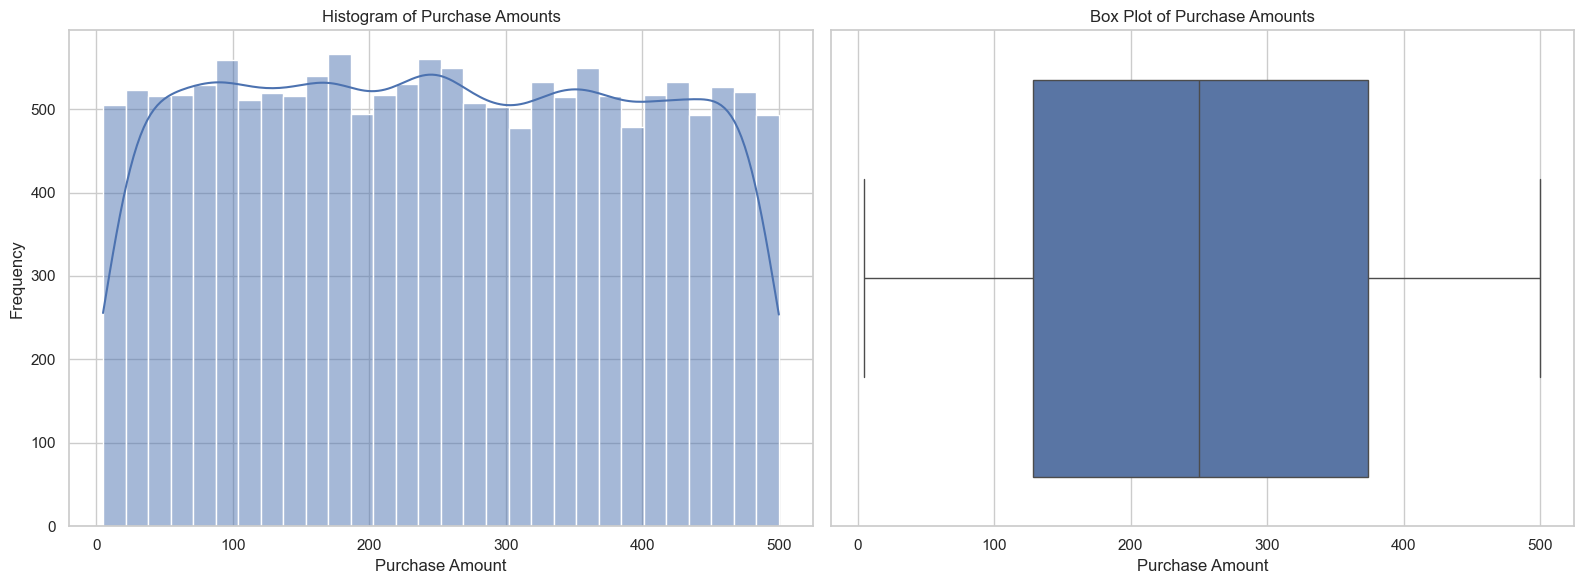

In [28]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot histogram
sns.histplot(merged_df['purchase_amount'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Purchase Amounts')
axes[0].set_xlabel('Purchase Amount')
axes[0].set_ylabel('Frequency')

# Plot box plot
sns.boxplot(x=merged_df['purchase_amount'], ax=axes[1])
axes[1].set_title('Box Plot of Purchase Amounts')
axes[1].set_xlabel('Purchase Amount')

# Show the plots
plt.tight_layout()
plt.show()

#### No outliers found.

## Feature Engineering

### Create additional features and aggregate purchase behavior over time to improve the model performance.

1. Aggregate purchase behavior for each client: Calculate total purchase amount, average purchase amount, number of unique items purchased, number of purchases, etc.
2. Aggregate purchase behavior over time: Summarize data monthly or quarterly.

In [29]:
# Group by client_id to calculate aggregated features
client_features = merged_df.groupby('client_id').agg(
    total_purchase_amount=('purchase_amount', 'sum'),
    average_purchase_amount=('purchase_amount', 'mean'),
    unique_items_purchased=('item_name', 'nunique'),
    number_of_purchases=('purchase_amount', 'count')
).reset_index()

# Merge the client features back with the gender information
client_features = client_features.merge(merged_df[['client_id', 'gender']].drop_duplicates(), on='client_id', how='left')

print(client_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_id                997 non-null    int32  
 1   total_purchase_amount    997 non-null    float64
 2   average_purchase_amount  997 non-null    float64
 3   unique_items_purchased   997 non-null    int64  
 4   number_of_purchases      997 non-null    int64  
 5   gender                   997 non-null    object 
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 43.0+ KB
None


In [30]:
# Create additional time-based features
merged_df['year_month'] = merged_df['date'].dt.to_period('M')

# Group by client_id and year_month to calculate monthly aggregated features
monthly_features = merged_df.groupby(['client_id', 'year_month']).agg(
    monthly_total_purchase=('purchase_amount', 'sum'),
    monthly_avg_purchase=('purchase_amount', 'mean'),
    monthly_unique_items=('item_name', 'nunique'),
    monthly_number_of_purchases=('purchase_amount', 'count')
).reset_index()

# Pivot the monthly features to create time series features
monthly_features_pivot = monthly_features.pivot_table(
    index='client_id',
    columns='year_month',
    values=['monthly_total_purchase', 'monthly_avg_purchase', 'monthly_unique_items', 'monthly_number_of_purchases']
)

# Flatten the multi-level column index
monthly_features_pivot.columns = ['_'.join(map(str, col)).strip() for col in monthly_features_pivot.columns.values]
monthly_features_pivot.reset_index(inplace=True)

# Merge the time series features with the client features
client_features = client_features.merge(monthly_features_pivot, on='client_id', how='left')



In [31]:
print(client_features.head())
print(client_features.info())

   client_id  total_purchase_amount  average_purchase_amount  \
0          1                4455.92               297.061333   
1          2                1905.70               238.212500   
2          3                 958.61               319.536667   
3          4                4024.34               287.452857   
4          5                1659.29               237.041429   

   unique_items_purchased  number_of_purchases  gender  \
0                      10                   15    Male   
1                       7                    8  Female   
2                       3                    3  Female   
3                      10                   14  Female   
4                       6                    7    Male   

   monthly_avg_purchase_2020-01  monthly_avg_purchase_2020-02  \
0                        367.45                         31.08   
1                           NaN                           NaN   
2                           NaN                           NaN   
3     

###  Creating feature for every item name. Count the number of items of that item_name for each client.
We will try to find patterns of each client based on their behavior of what kind of items they are buying.

In [32]:
# Create a pivot table where rows are client_id and columns are item_name
item_features = merged_df.pivot_table(
    index='client_id',
    columns='item_name',
    values='purchase_amount',  # This should be changed to a column that represents counts, such as 'purchase_id'
    aggfunc='count',           # Using 'count' to get the number of items purchased
    fill_value=0
).reset_index()

# Flatten the multi-level column index
item_features.columns.name = None
item_features.columns = ['client_id'] + [f'item_count_{col}' for col in item_features.columns[1:]]

# Display the first few rows of the item_features dataframe
print("Item Features:")
print(item_features.head())
print(item_features.info())

Item Features:
   client_id  item_count_Item1  item_count_Item10  item_count_Item100  \
0          1                 0                  0                   0   
1          2                 0                  0                   0   
2          3                 0                  0                   0   
3          4                 0                  0                   1   
4          5                 0                  0                   0   

   item_count_Item101  item_count_Item102  item_count_Item103  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   item_count_Item104  item_count_Item105  item_count_Item106  ...  \
0                   0                   0                   0  ...   
1              

### Creating more features of total purchase_amont of every item_name by counting the total amount of each item type for every client
We create total purchase for each item_name trying to find patterns based on the money spent on any item type.

In [33]:
# Group by client_id and item_name to sum the purchase amount of each item_name for each client
item_purchase_amounts = merged_df.groupby(['client_id', 'item_name'])['purchase_amount'].sum().unstack(fill_value=0).reset_index()

# Add prefix to the column names for total purchase amount
item_purchase_amounts.columns = ['client_id'] + [f'purchase_amount_{col}' for col in item_purchase_amounts.columns[1:]]

# Display the first few rows of the item_purchase_amounts dataframe
print("Item Purchase Amounts:")
print(item_purchase_amounts.head())


Item Purchase Amounts:
   client_id  purchase_amount_Item1  purchase_amount_Item10  \
0          1                    0.0                     0.0   
1          2                    0.0                     0.0   
2          3                    0.0                     0.0   
3          4                    0.0                     0.0   
4          5                    0.0                     0.0   

   purchase_amount_Item100  purchase_amount_Item101  purchase_amount_Item102  \
0                     0.00                      0.0                      0.0   
1                     0.00                      0.0                      0.0   
2                     0.00                      0.0                      0.0   
3                   408.84                      0.0                      0.0   
4                     0.00                      0.0                      0.0   

   purchase_amount_Item103  purchase_amount_Item104  purchase_amount_Item105  \
0                      0.0           

### Creating features containing % of purchace_amounts for each item_category for every client

In [34]:
# Group by client_id and item_category to calculate total purchase amount for each item category for every client
category_purchase_amount = merged_df.groupby(['client_id', 'item_category'])['purchase_amount'].sum().reset_index()

# Display the first few rows of the category_purchase_amount dataframe
print("Category Purchase Amount:")
print(category_purchase_amount.head())

Category Purchase Amount:
   client_id    item_category  purchase_amount
0          1            Books           427.49
1          1         Clothing           786.10
2          1      Electronics           452.17
3          1  Health & Beauty           892.18
4          1    Home & Garden          1897.98


In [35]:
# Pivot the data to create a matrix of item categories and their purchase amounts for each client
category_purchase_pivot = category_purchase_amount.pivot_table(
    index='client_id',
    columns='item_category',
    values='purchase_amount',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Calculate the percentage of purchase amount for each item category for every client
category_purchase_percentages = category_purchase_pivot.drop(columns=['client_id']).div(category_purchase_pivot.drop(columns=['client_id']).sum(axis=1), axis=0) * 100

# Add prefix to the column names
category_purchase_percentages.columns = ['% purchase_amount ' + col for col in category_purchase_percentages.columns]

# Merge client_id back to the dataframe
category_purchase_percentages['client_id'] = category_purchase_pivot['client_id']

# Display the first few rows of the category_purchase_percentages dataframe
print("Category Purchase Percentages:")
print(category_purchase_percentages.head())

print(category_purchase_percentages.info())

Category Purchase Percentages:
   % purchase_amount Books  % purchase_amount Clothing  \
0                 9.593754                   17.641699   
1                25.352364                    1.481870   
2                 0.000000                    0.000000   
3                 4.708350                   23.756194   
4                 5.656034                   29.839269   

   % purchase_amount Electronics  % purchase_amount Health & Beauty  \
0                      10.147624                          20.022352   
1                      19.570761                          29.858845   
2                      27.283254                          33.041591   
3                      11.802184                          25.391741   
4                       0.000000                          37.438302   

   % purchase_amount Home & Garden  % purchase_amount UnknownCategory  \
0                        42.594571                             0.0000   
1                        23.736160             

In [37]:
# Group by client_id and item_name to count the number of items of each item_name purchased by each client
item_counts = merged_df.groupby(['client_id', 'item_name']).size().unstack(fill_value=0).reset_index()

# Merge the item counts with the existing client features
client_features = client_features.merge(item_counts, on='client_id', how='left')

# Fill any NaN values with 0 (in case there are any clients who didn't purchase certain items)
client_features.fillna(0, inplace=True)

# Display the first few rows of the merged client_features dataframe
print("Merged Client Features with Item Counts:")
print(client_features.head())


Merged Client Features with Item Counts:
   client_id  total_purchase_amount  average_purchase_amount  \
0          1                4455.92               297.061333   
1          2                1905.70               238.212500   
2          3                 958.61               319.536667   
3          4                4024.34               287.452857   
4          5                1659.29               237.041429   

   unique_items_purchased  number_of_purchases  gender  \
0                      10                   15    Male   
1                       7                    8  Female   
2                       3                    3  Female   
3                      10                   14  Female   
4                       6                    7    Male   

   monthly_avg_purchase_2020-01  monthly_avg_purchase_2020-02  \
0                        367.45                         31.08   
1                          0.00                          0.00   
2                          0.0

### Combining all the features created for model training

In [38]:
# Ensure client_id column names match across all dataframes for merging
category_purchase_percentages.rename(columns={'client_id': 'client_id'}, inplace=True)
item_purchase_amounts.rename(columns={'client_id': 'client_id'}, inplace=True)
item_counts.rename(columns={'client_id': 'client_id'}, inplace=True)

# Merge the dataframes
merged_features = client_features.merge(category_purchase_percentages, on='client_id', how='left')
merged_features = merged_features.merge(item_purchase_amounts, on='client_id', how='left')
merged_features = merged_features.merge(item_counts, on='client_id', how='left')

# Fill any NaN values with 0 (in case there are any clients who didn't have certain features)
merged_features.fillna(0, inplace=True)

# Display the first few rows of the merged_features dataframe
print("Merged Features DataFrame:")
print(merged_features.head())


Merged Features DataFrame:
   client_id  total_purchase_amount  average_purchase_amount  \
0          1                4455.92               297.061333   
1          2                1905.70               238.212500   
2          3                 958.61               319.536667   
3          4                4024.34               287.452857   
4          5                1659.29               237.041429   

   unique_items_purchased  number_of_purchases  gender  \
0                      10                   15    Male   
1                       7                    8  Female   
2                       3                    3  Female   
3                      10                   14  Female   
4                       6                    7    Male   

   monthly_avg_purchase_2020-01  monthly_avg_purchase_2020-02  \
0                        367.45                         31.08   
1                          0.00                          0.00   
2                          0.00             

In [39]:
merged_features.shape

(997, 708)

## Model Training

### Split the Data into Features and Target Variable

In [40]:
# Define the target variable
target = 'gender'

# Define the features (all columns except client_id and target)
features = merged_features.drop(columns=['client_id', target])

# Define the target variable
y = merged_features[target]

# Display the first few rows of features and target variable
print("Features:")
print(features.head())

print("\nTarget:")
print(y.head())


Features:
   total_purchase_amount  average_purchase_amount  unique_items_purchased  \
0                4455.92               297.061333                      10   
1                1905.70               238.212500                       7   
2                 958.61               319.536667                       3   
3                4024.34               287.452857                      10   
4                1659.29               237.041429                       6   

   number_of_purchases  monthly_avg_purchase_2020-01  \
0                   15                        367.45   
1                    8                          0.00   
2                    3                          0.00   
3                   14                         68.79   
4                    7                          0.00   

   monthly_avg_purchase_2020-02  monthly_avg_purchase_2020-03  \
0                         31.08                        159.86   
1                          0.00                         49.2

### Encode the target variable.

In [41]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

# Display the first few encoded values
print("Encoded Target Variable:")
print(y_encoded[:5])

# Check unique labels in the target variable
unique_labels = y.unique()
num_labels = len(unique_labels)

print("Unique Labels in Target Variable:")
print(unique_labels)
print("Number of Unique Labels:", num_labels)



Encoded Target Variable:
[1 0 0 0 1]
Unique Labels in Target Variable:
['Male' 'Female' 'Non-Binary']
Number of Unique Labels: 3


### Split the Data into Training and Testing Sets. There is some class imbalancing so used stratified sampling to split.

In [42]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(features, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Display the shapes of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

# Check the distribution of the target variable in the training and testing sets
print("Training Set Target Distribution:")
print(pd.Series(y_train).value_counts(normalize=True))

print("\nTesting Set Target Distribution:")
print(pd.Series(y_test).value_counts(normalize=True))


Training Features Shape: (797, 706)
Testing Features Shape: (200, 706)
Training Target Shape: (797,)
Testing Target Shape: (200,)
Training Set Target Distribution:
1    0.484316
0    0.478043
2    0.037641
Name: proportion, dtype: float64

Testing Set Target Distribution:
1    0.485
0    0.475
2    0.040
Name: proportion, dtype: float64


### Apply SMOTE to the Training Data to tackle class imbalance

In [44]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the resampled training set
print("Resampled Training Set:")
print(X_train_resampled)
print(y_train_resampled)

# Check the distribution of the target variable in the training after appliying SMOTE
print("Training Set Target Distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))


Resampled Training Set:
      total_purchase_amount  average_purchase_amount  unique_items_purchased  \
0               2467.610000               205.634167                       8   
1               5131.050000               223.089130                      11   
2               3754.800000               234.675000                       7   
3               2672.410000               205.570000                       7   
4                981.550000               327.183333                       3   
...                     ...                      ...                     ...   
1153            2806.662623               239.117872                      11   
1154            3208.149907               282.001895                      11   
1155            4366.848061               311.917719                      13   
1156            2175.685391               245.980629                       8   
1157            3833.773263               277.770771                      13   

      number_of

## Model Building

### Let's dive into building and training the model. We implement two models Random forrest and XGBoost. For XGBoost we again implement with and without cross-validation.

### Randomforrest

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

from sklearn.metrics import classification_report

# Train the Random Forest model
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91        95
           1       0.88      0.95      0.92        97
           2       1.00      1.00      1.00         8

    accuracy                           0.92       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.92      0.92      0.91       200



### XGBoost

In [47]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Model Evaluation:")
print(classification_report(y_test, y_pred_xgb))



XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        95
           1       0.89      0.92      0.90        97
           2       1.00      1.00      1.00         8

    accuracy                           0.91       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.91      0.91      0.90       200



### XGBoost with  5 folds cross validation

In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Perform cross-validation with 5 folds
scores = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv=5)

# Display the cross-validation scores
print("Cross-Validation Scores (Accuracy):", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores (Accuracy): [0.91810345 0.93103448 0.94396552 0.94372294 0.96103896]
Mean Accuracy: 0.9395730706075532


In [49]:
# Train the XGBoost model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_test = xgb_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        95
           1       0.89      0.92      0.90        97
           2       1.00      1.00      1.00         8

    accuracy                           0.91       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.91      0.91      0.90       200



### In conclusion, both the models performed extremely well in predicting the gender. the cross-validation deos not seem to improve any performance in the model. 

Key takeawyas: 
    1. XGBoost performed slightly better than Random forrest.
    2. The Non-binary gender was predicted with 100% accuracy. Hence SMOTE technique seems to have helped.
